In [181]:
from google.colab import files
files.upload()

Saving output.xlsx to output (1).xlsx


{'output.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00Re\x9cN\xe4\xc5\x13\xbd\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddn\xe9\xa1\x07\x89\x01A\x8f\x05O\xdeC\xba\xb1\x81$\x1b\xb2+\xe4\xe7\x9b\n~\xdc\xe6\xf1\x86a\xd4\xadP\xc6"\x1e\xb9\xab1$>\xf5\x9bH>\x02\xb0\xdd0\x1a\x1e\x9aN\xcd8*\xd1H\xc3\xf2\x00r\xce[\xbc\x90}FL\x02\xd38\xce\x80U0\xad\xb8\x1e\xf2w\xb0\xd7\xea\x9cs\xf0\xd6\x88\xa7\xa4\x17o\x0b19\xe9\xae\xd5bP\xf0/\xf7\xe6\x1d\x0b\xefy\x1a\xe6\xb7\xfc\xb0\x82\xdfI\xfd\x02PK\x03\x04\x14\x00\x00\x00\x08\x00Re\x9cN\xbcGlu\xec\x00\x00\x00\xcb\x01\x00\x00\x11\x00\x00\x00docProps/core.xml\xa5\x91MO\xc30\x0c\x86\xff\xca\x94{\xeb\xa6\x9d\xf8\x88\xb2\\\x98v\x02\t\x89I nQ\xe2m\x15M\x1b%F\xed\xfe=i\xd9:\x10\xdcv\x8c\xdf\xc7\x8fmE\x1a/L\x17\xf09t\x1e\x03\xd5\x18\x17\x83k\xda(\x8c_\xb1\x03\x91\x17\x00\xd1\x1c\xd0\xe9\x98\'\xa2M\xe1\xae\x0bNSz\x86=xm>\xf4\x1e\xa1,\x8a\x1bpH\xdaj\xd20\n3?\x1b\xd9Ii\xcd\xac\xf4\x9f\xa1\x99\x04\xd6\x006\xe8\xb0\xa5\x0

In [0]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.ExcelFile('output.xlsx')


In [0]:
df1 = pd.read_excel(df)

In [185]:
df1.head(13)

,month_year,Total_Bookings
0,2016-01,136
1,2016-02,218
2,2016-03,338
3,2016-04,248
4,2016-05,129
5,2016-06,157
6,2016-07,331
7,2016-08,138
8,2016-09,199
9,2016-10,358


In [0]:
df1.set_index('month_year', inplace=True)

In [187]:
df1.tail()

,month_year,Total_Bookings
34,2018-11,139
35,2018-12,52
36,2019-01,120
37,2019-02,95
38,2019-03,117


In [0]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df1[0:36] 
test=df1[36:]

In [192]:
train.tail()

,month_year,Total_Bookings
31,2018-08,104
32,2018-09,88
33,2018-10,147
34,2018-11,139
35,2018-12,52


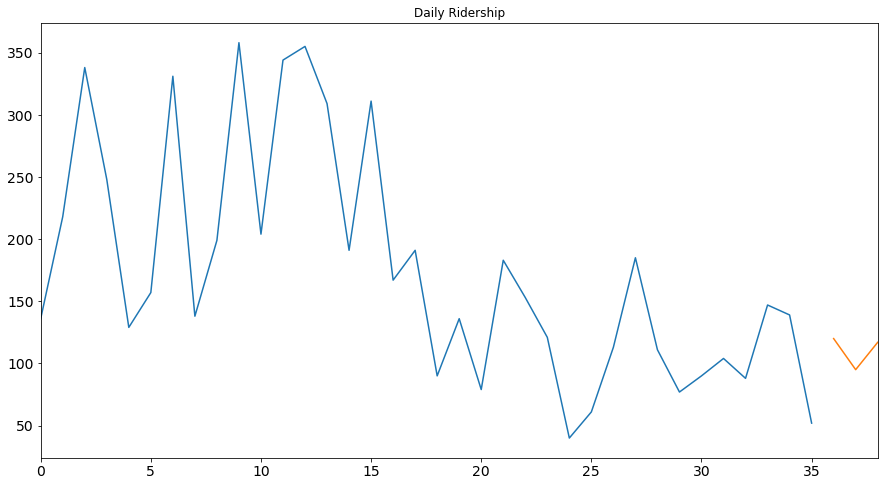

In [194]:
#Plotting data
train.Total_Bookings.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Total_Bookings.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

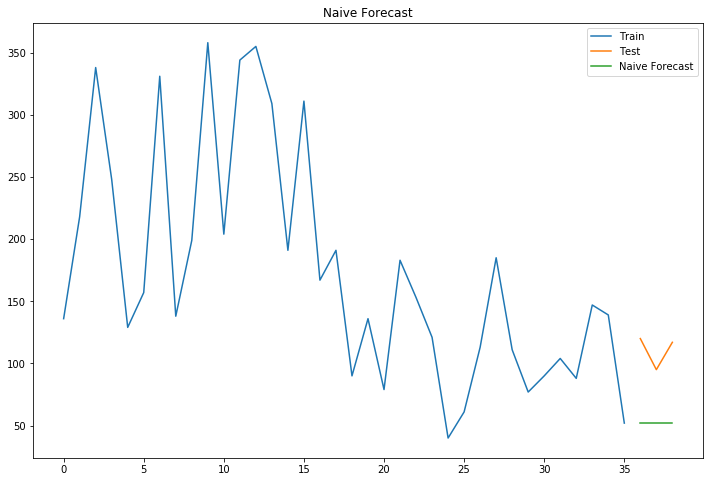

In [197]:
#naive
dd= np.asarray(train.Total_Bookings)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Total_Bookings'], label='Train')
plt.plot(test.index,test['Total_Bookings'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [200]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Total_Bookings, y_hat.naive))
print(rms)



59.715994507334464


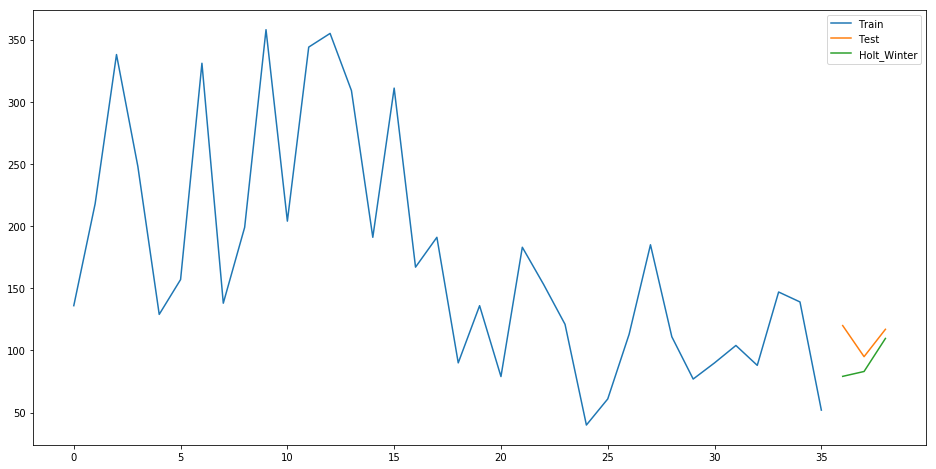

In [214]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Total_Bookings']) ,seasonal_periods=8 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Total_Bookings'], label='Train')
plt.plot(test['Total_Bookings'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [215]:
rms = sqrt(mean_squared_error(test.Total_Bookings, y_hat_avg.Holt_Winter))
print(rms)



24.93238446552749


In [220]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Total_Bookings, order=(2, 1, 4),seasonal_order=(0,1,1,7),enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2019-01", end="2019-03", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Total_Bookings'], label='Train')
plt.plot(test['Total_Bookings'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

KeyError: ignored

In [135]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total_Bookings,39.0,169.871795,91.105254,40.0,107.5,139.0,201.5,358.0


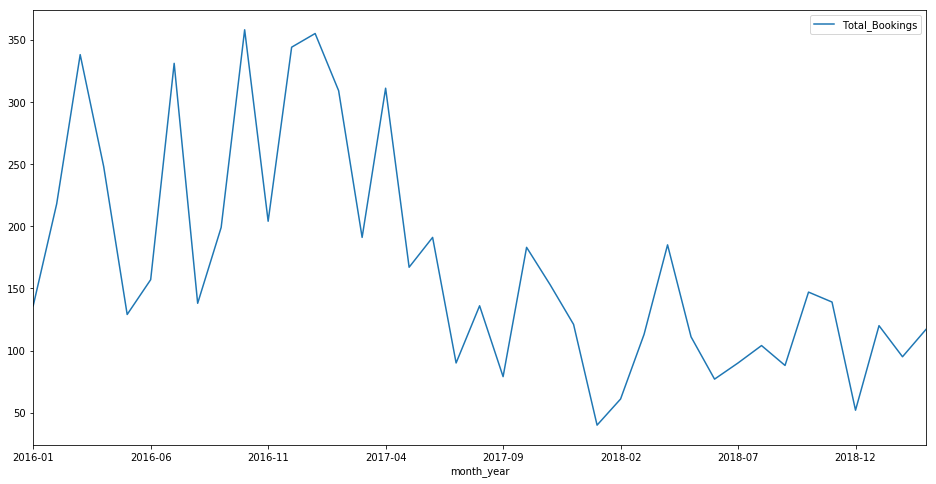

In [136]:
df1.plot(figsize=(16, 8))
plt.show()

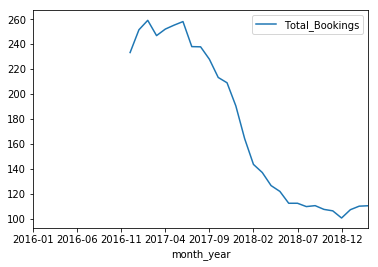

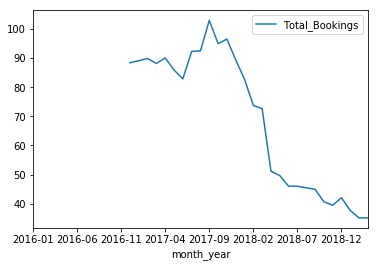

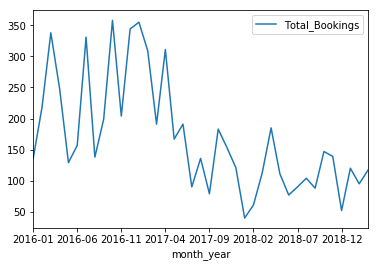

In [137]:
df1.rolling(12).mean().plot(label='12 Month Rolling Mean')
df1.rolling(12).std().plot(label='12 Month Rolling Std')
df1.plot()
plt.legend()

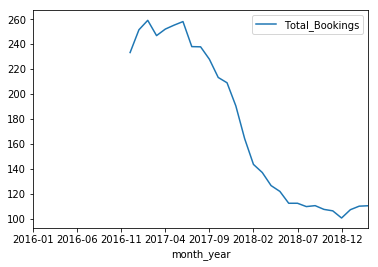

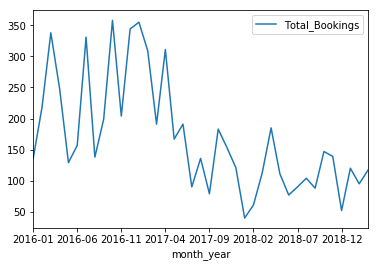

In [138]:
df1.rolling(12).mean().plot(label='12 Month Rolling Mean')
df1.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

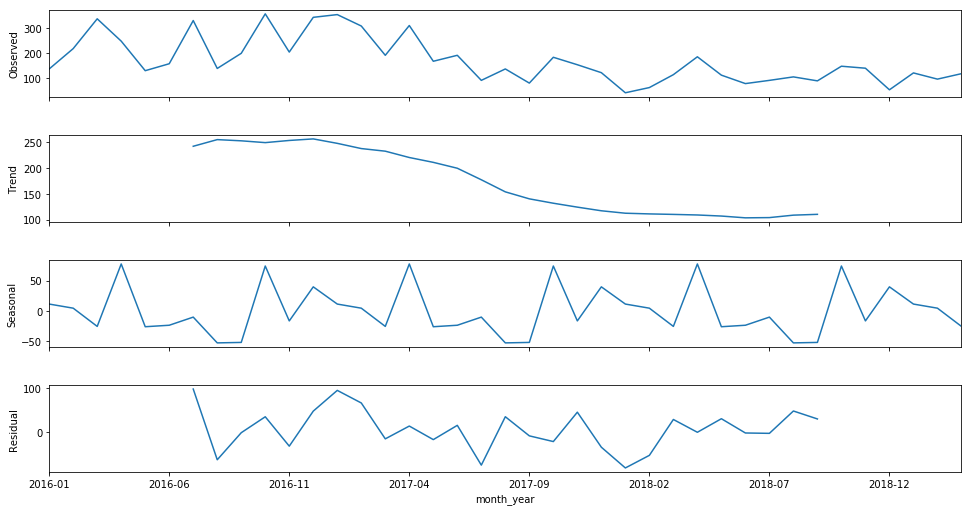

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1['Total_Bookings'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
result = adfuller(df1['Total_Bookings'])

In [142]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9893580751839528
p-value : 0.7571258826820213
#Lags Used : 8
Number of Observations Used : 30
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [0]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [0]:
df1['First']=df1.Total_Bookings-df1.Total_Bookings.shift(1)

In [145]:
adf_check(df1['Total_Bookings'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9893580751839528
p-value : 0.7571258826820213
#Lags Used : 8
Number of Observations Used : 30
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [146]:
adf_check(df1['First'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.9168774559922415
p-value : 0.3241635501312386
#Lags Used : 7
Number of Observations Used : 30
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


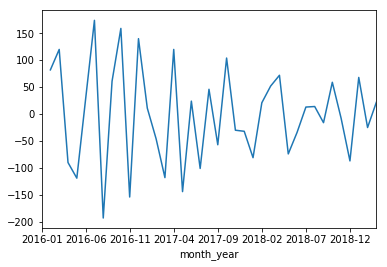

In [147]:
df1['First'].plot()

In [0]:
#df['Bookings Second Difference'] = df['First'] - df['First'].shift(1)
df1['Second']=df1.First-df1.First.shift(1)

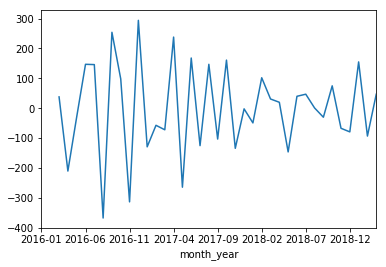

In [149]:
df1['Second'].plot()

In [150]:
df1.head()

,Total_Bookings,First,Second
month_year,,,
2016-01,136,NaN,NaN
2016-02,218,82.0,NaN
2016-03,338,120.0,38.0
2016-04,248,-90.0,-210.0
2016-05,129,-119.0,-29.0


In [151]:
adf_check(df1['Second'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.107475374817991
p-value : 0.026004900672684732
#Lags Used : 9
Number of Observations Used : 27
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [0]:
df1[' Seasonal First diff']=df1.Total_Bookings-df1.Total_Bookings.shift(12)

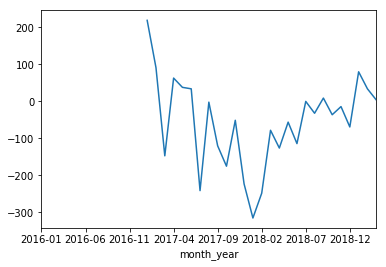

In [153]:
df1[' Seasonal First diff'].plot()

In [154]:
adf_check(df1[' Seasonal First diff'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -3.889165464647429
p-value : 0.002116046114886588
#Lags Used : 0
Number of Observations Used : 26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [0]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

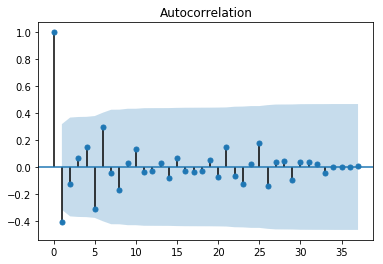

In [156]:
# Duplicate plots
# Check out: https://stackoverflow.com/questions/21788593/statsmodels-duplicate-charts
# https://github.com/statsmodels/statsmodels/issues/1265
fig_first = plot_acf(df1["First"].dropna())

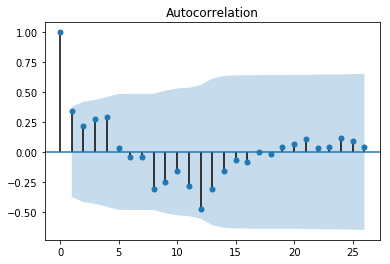

In [157]:
fig_seasonal_first = plot_acf(df1[" Seasonal First diff"].dropna())

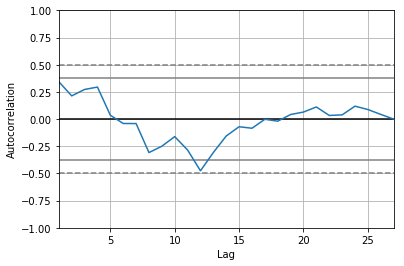

In [158]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df1[' Seasonal First diff'].dropna())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


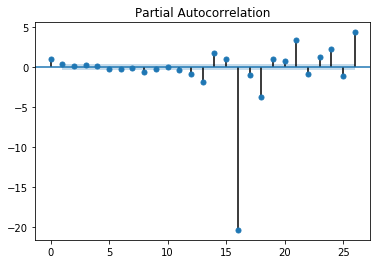

In [159]:
result = plot_pacf(df1[" Seasonal First diff"].dropna())

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


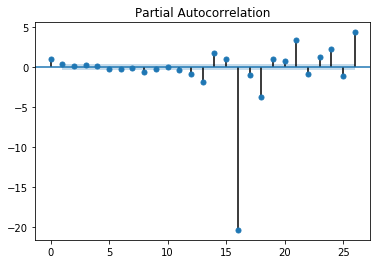

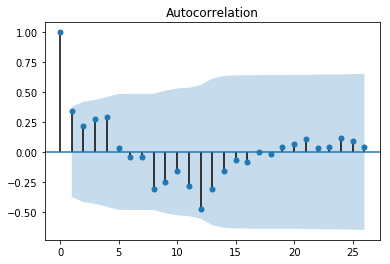

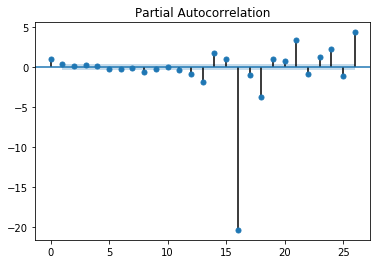

In [160]:
plot_acf(df1[" Seasonal First diff"].dropna())
plot_pacf(df1[" Seasonal First diff"].dropna())

In [0]:
# For non-seasonal data
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [270]:
# We have seasonal data!
model = SARIMAX(df3.Total_Bookings,order=(1,0,1),seasonal_order=(0,0,0,1))
results = model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:         Total_Bookings   No. Observations:                   36
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -208.605
Date:                Sun, 28 Apr 2019   AIC                            423.210
Time:                        08:56:59   BIC                            427.960
Sample:                    01-01-2016   HQIC                           424.868
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9872      0.021     47.158      0.000       0.946       1.028
ma.L1         -0.6481      0.166     -3.904      0.000      -0.973      -0.323
sigma2      5948.9110   1789.672      3.324      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


In [271]:
pred = results.get_prediction(start=pd.to_datetime('2019-01'),end=pd.to_datetime('2019-03'), dynamic=True)
pred_ci = pred.conf_int()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [0]:
s_forecasted = pred.predicted_mean
s_forecasted=pd.DataFrame(s_forecasted)
s_forecasted.columns = ['pred_bookings']

s_truth = df1['2019-01':]

In [279]:
df1

,Total_Bookings
month_year,
2016-01,136
2016-02,218
2016-03,338
2016-04,248
2016-05,129
2016-06,157
2016-07,331
2016-08,138
2016-09,199


In [273]:
s_truth

,Total_Bookings
month_year,
2019-01,120
2019-02,95
2019-03,117


In [274]:
s_forecasted

,pred_bookings
2019-01-01,94.541641
2019-02-01,93.327789
2019-03-01,92.129522


In [275]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#    acf1 = acf(fc-test)[1] 
#    acf1=acf(s_forecasted['pred_bookings']-s_truth['Total_Bookings'])                     # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(s_forecasted['pred_bookings'],s_truth['Total_Bookings'])

{'corr': 0.11359387899212744,
 'mae': 17.333682439410584,
 'mape': 0.1474411315104818,
 'me': -17.333682439410584,
 'minmax': 0.14744113151048177,
 'mpe': -0.1474411315104818,
 'rmse': 20.570731507522176}

In [227]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
month_year        39 non-null object
Total_Bookings    39 non-null int64
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [252]:
df3.tail()

month_year
2018-08    104
2018-09     88
2018-10    147
2018-11    139
2018-12     52
Name: Total_Bookings, dtype: int64

In [0]:
df3=df1.Total_Bookings[:'2018-12']
df3=pd.DataFrame(df3)

In [98]:
!pip install pmdarima

In [269]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model = pm.auto_arima(df3.Total_Bookings, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=421.961, BIC=428.295, Fit time=0.110 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=431.607, BIC=434.774, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=423.676, BIC=428.427, Fit time=0.037 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=426.803, BIC=431.553, Fit time=0.060 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=423.959, BIC=431.877, Fit time=0.144 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=423.957, BIC=431.875, Fit time=0.092 seconds
Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=425.902, BIC=435.403, Fit time=0.137 seconds
Total fit time: 0.591 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -206.98

In [85]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
statsmodels.tsa.holtwinters.HoltWintersResults
model = ExponentialSmoothing(df1.Total_Bookings)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df1.Total_Bookings), len(df1.Total_Bookings))
print(yhat)

39    107.122162
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [86]:
print(model_fit.summary())

None


In [222]:
df1.tail()

,month_year,Total_Bookings
34,2018-11,139
35,2018-12,52
36,2019-01,120
37,2019-02,95
38,2019-03,117


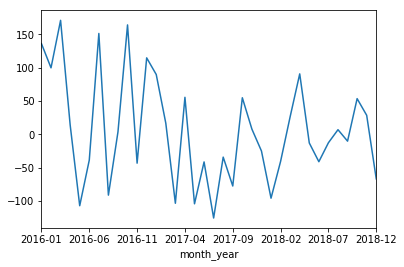

In [277]:
results.resid.plot()

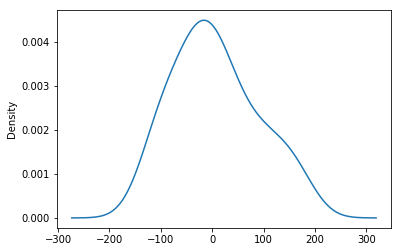

In [278]:
results.resid.plot(kind='kde')

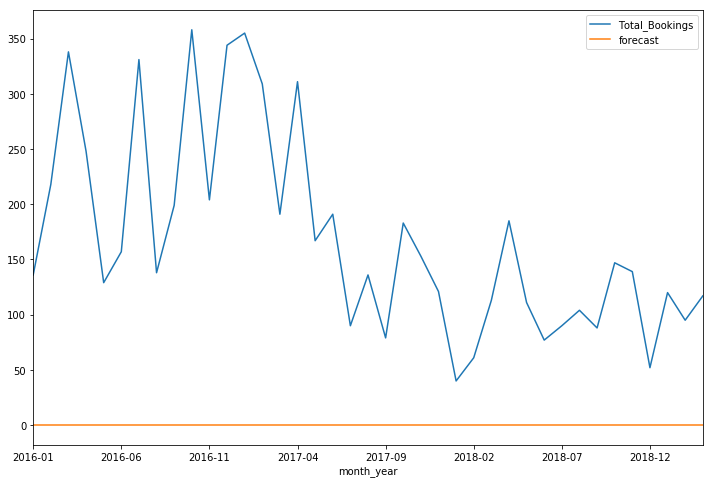

In [180]:
df1['forecast'] = results.predict(dynamic= True)  
df1[['Total_Bookings','forecast']].plot(figsize=(12,8))

In [114]:
df1

,Total_Bookings,First,Second,Seasonal First diff,forecast
month_year,,,,,
2016-01,136,NaN,NaN,NaN,0.0
2016-02,218,82.0,NaN,NaN,0.0
2016-03,338,120.0,38.0,NaN,0.0
2016-04,248,-90.0,-210.0,NaN,0.0
2016-05,129,-119.0,-29.0,NaN,0.0
2016-06,157,28.0,147.0,NaN,0.0
2016-07,331,174.0,146.0,NaN,0.0
2016-08,138,-193.0,-367.0,NaN,0.0
2016-09,199,61.0,254.0,NaN,0.0
